# Classification

## Classification using Linear Regression


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.random.normal(5,1,10)
x1 = np.append(np.random.normal(5, 1, 9), 20) #
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

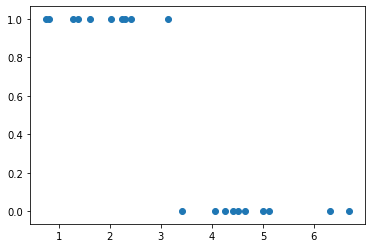

In [3]:
plt.scatter(x,labels)

In [4]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0.,0.],name="parameter",dtype=tf.float32)

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

y_pred = model(X,w)
cost = tf.reduce_sum(tf.square(Y-y_pred))

trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_pred,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #costs= []
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    #print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:labels}))
    #print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:labels}))
    #print(sess.run(tf.greater(y_pred,0.5),feed_dict={X:x,Y:labels}))
    sess.close()
        

0   8.778688
100   2.599059
200   1.4481404
300   1.2259932
400   1.1831151
500   1.1748389
600   1.1732414
700   1.1729329
800   1.1728733
900   1.1728619
Learned parameter :  [ 1.3321502  -0.25076604]


In [6]:
y_model=w_val[0]+w_val[1]*x

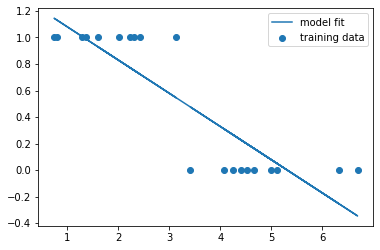

In [7]:
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## What if there are outliers?

In [8]:
x1 = np.append(np.random.normal(5, 1, 9), 20) #outlier added
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    sess.close()

0   9.093418
100   3.8888495
200   3.7717733
300   3.7690945
400   3.7690337
500   3.769032
600   3.769032
700   3.7690322
800   3.7690322
900   3.7690322
Learned parameter :  [ 0.76063544 -0.06284973]


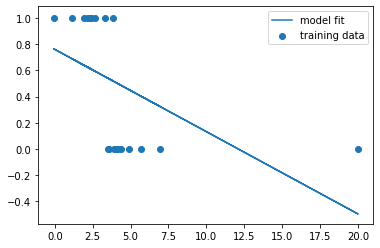

In [9]:
y_model=w_val[0]+w_val[1]*x
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()